<a href="https://colab.research.google.com/github/teena21/CodSoft-/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [5]:
data_frames= pd.read_csv("/content/advertising.csv")
print(data_frames.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


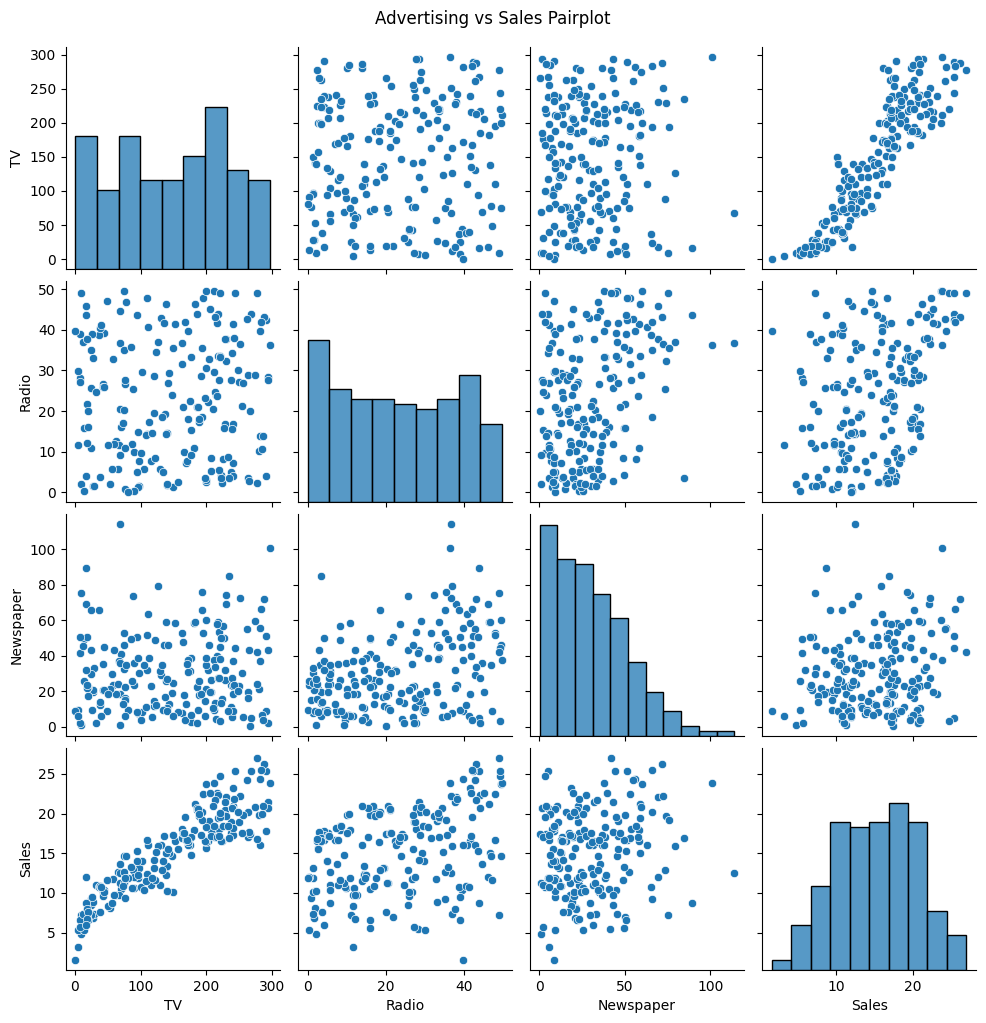

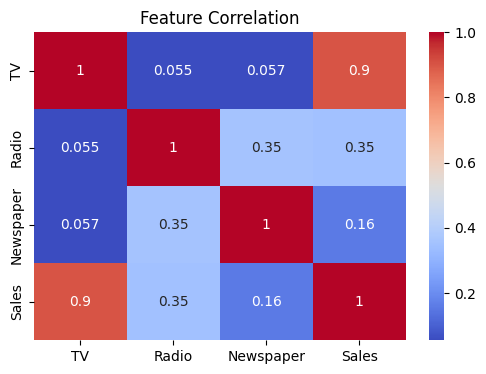

In [16]:
sns.pairplot(data_frames)
plt.suptitle("Advertising vs Sales Pairplot", y=1.02)
plt.show()
plt.figure(figsize=(6, 4))
sns.heatmap(data_frames.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [9]:
X = data_frames[['TV', 'Radio', 'Newspaper']]
y = data_frames['Sales']

In [10]:
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split( X, y, test_size=0.2, random_state=42)

In [12]:
linear_reg = LinearRegression()  # linear use of dataset
linear_reg.fit(X_train_data, y_train_data)
y_pred = linear_reg.predict(X_test_data)
mean_sq = mean_squared_error(y_test_data, y_pred)
r2 = r2_score(y_test_data, y_pred)
print(f"Linear Regression → MSE: {mean_sq:.3f}, R²: {r2:.3f}")


Linear Regression → MSE: 2.908, R²: 0.906


In [13]:
poly_reg = PolynomialFeatures(degree=2, include_bias=False)  # for non-linear effect
X_poly = poly_reg.fit_transform(X)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_poly, y, test_size=0.2, random_state=42)
linear_reg2 = LinearRegression()
linear_reg2.fit(X_train2, y_train2)
y_pred2 = linear_reg2.predict(X_test2)
mean_sq2 = mean_squared_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)
print(f"Polynomial Regression (degree 2) → MSE: {mean_sq2:.3f}, R²: {r2_2:.3f}")


Polynomial Regression (degree 2) → MSE: 1.443, R²: 0.953


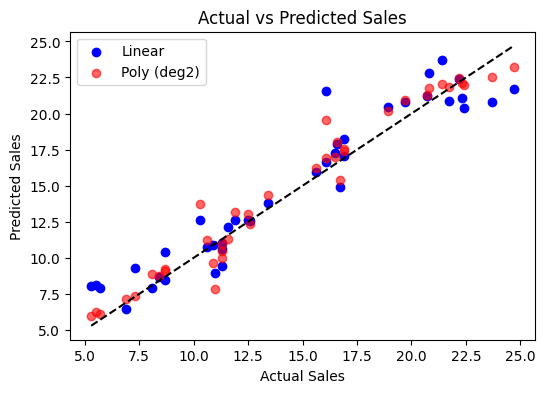

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test_data, y_pred, color='blue', label='Linear')
plt.scatter(y_test2, y_pred2, color='red', label='Poly (deg2)', alpha=0.6)
plt.plot([y_test_data.min(), y_test_data.max()], [y_test_data.min(), y_test_data.max()], 'k--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()


In [15]:
coefs = pd.Series(linear_reg.coef_, index=['TV', 'radio', 'newspaper'])
print("Linear Regression Coefficients:\n", coefs)


Linear Regression Coefficients:
 TV           0.054509
radio        0.100945
newspaper    0.004337
dtype: float64


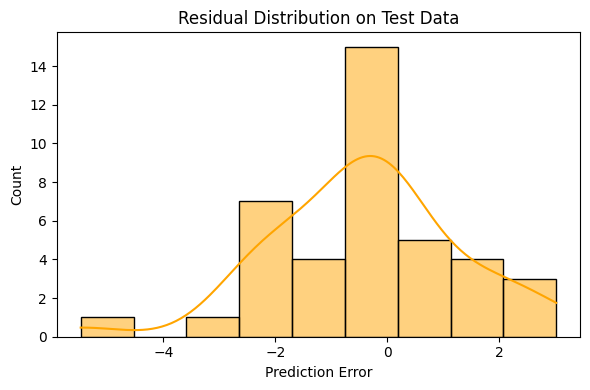

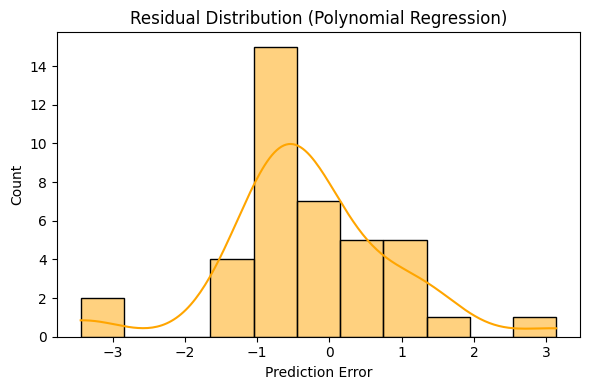

In [20]:
#for linear regression
residuals = y_test_data - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Residual Distribution on Test Data")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()

#for polynomial regression
residuals_poly = y_test_data - y_pred2
plt.figure(figsize=(6, 4))
sns.histplot(residuals_poly, kde=True, color='orange')
plt.title("Residual Distribution (Polynomial Regression)")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()
